In [25]:
import pandas as pd
df = pd.read_csv("API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_38061.csv", skiprows=4)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.194666,7.346331,7.360513,7.584419,8.191395,8.577385,7.985202,7.806365,7.772654,NaN
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,10.133000,11.184000,11.196000,11.185000,11.710000,11.994000,14.100000,13.991000,13.295000,NaN
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.157574,4.274196,4.323631,4.395271,4.852393,4.736732,3.658573,3.277245,3.218313,NaN
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.575000,16.610000,16.594000,16.497000,16.690000,15.799000,14.602000,14.537000,14.464000,NaN


In [27]:
eu_countries = [
    "Germany", "France", "Italy", "Spain", "Netherlands", "Belgium", "Sweden", "Denmark",
    "Finland", "Austria", "Portugal", "Greece", "Ireland", "Poland", "Hungary", 
    "Czech Republic", "Slovakia", "Slovenia", "Estonia", "Latvia", "Lithuania", 
    "Bulgaria", "Romania", "Croatia", "Cyprus", "Luxembourg", "Malta"
]
df_eu = df[df["Country Name"].isin(eu_countries)]

In [29]:
df_eu.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
14,Austria,AUT,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.064,5.561,4.933,4.560,5.201,6.459,4.992,5.264,5.439,NaN
17,Belgium,BEL,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.830,7.090,5.941,5.364,5.545,6.248,5.570,5.528,5.488,NaN
21,Bulgaria,BGR,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.575,6.164,5.211,4.230,5.125,5.267,4.268,4.319,4.104,NaN
53,Cyprus,CYP,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,13.006,11.155,8.504,7.155,7.755,7.513,6.806,6.098,5.602,NaN
55,Germany,DEU,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.104,3.781,3.384,3.163,3.881,3.594,3.120,3.068,3.406,NaN


In [31]:
columns_to_keep = ["Country Name"] + [str(year) for year in range(2000, 2024)]
df_eu = df_eu[columns_to_keep]
df_eu.isna().sum().sum()


0

In [33]:
df_long = df_eu.melt(
    id_vars=["Country Name"],
    var_name="Year",
    value_name="Unemployment Rate"
)
df_long["Year"] = df_long["Year"].astype(int)
df_long["Unemployment Rate"] = pd.to_numeric(df_long["Unemployment Rate"], errors="coerce")
df_eu.head()


,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
14,Austria,4.687,4.007,4.852,4.779,5.969,5.682,5.320,4.909,4.198,...,5.674,5.802,6.064,5.561,4.933,4.560,5.201,6.459,4.992,5.264
17,Belgium,6.586,6.178,6.910,7.680,7.363,8.440,8.246,7.459,6.976,...,8.523,8.482,7.830,7.090,5.941,5.364,5.545,6.248,5.570,5.528
21,Bulgaria,16.218,19.921,18.110,13.733,12.037,10.083,8.951,6.878,5.609,...,11.424,9.143,7.575,6.164,5.211,4.230,5.125,5.267,4.268,4.319
53,Cyprus,4.766,4.043,3.336,4.153,4.770,5.481,4.593,3.946,3.756,...,16.277,15.026,13.006,11.155,8.504,7.155,7.755,7.513,6.806,6.098
55,Germany,7.917,7.773,8.482,9.779,10.727,11.193,10.277,8.732,7.508,...,4.979,4.612,4.104,3.781,3.384,3.163,3.881,3.594,3.120,3.068


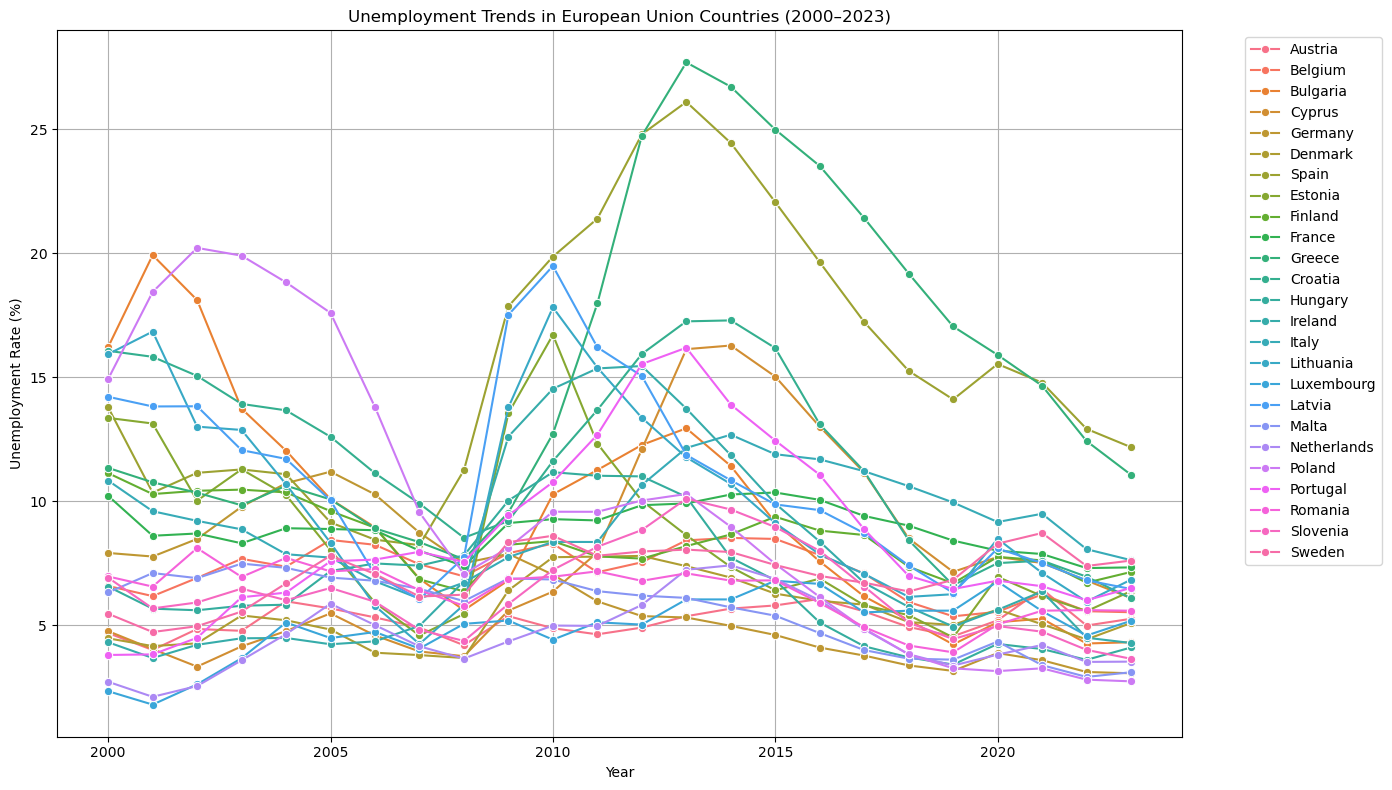

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_long, x="Year", y="Unemployment Rate", hue="Country Name", marker="o")

plt.title("Unemployment Trends in European Union Countries (2000–2023)")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [36]:
df_netherlands = df_eu[df_eu["Country Name"] == "Netherlands"]
df_nl_long = df_netherlands.melt(
    id_vars=["Country Name"],
    var_name="Year",
    value_name="Unemployment Rate"
)
df_nl_long["Year"] = df_nl_long["Year"].astype(int)
df_netherlands.head()

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
176,Netherlands,2.725,2.119,2.554,3.593,4.646,5.872,5.007,4.153,3.658,...,7.419,6.872,6.007,4.837,3.832,3.379,3.82,4.209,3.526,3.537


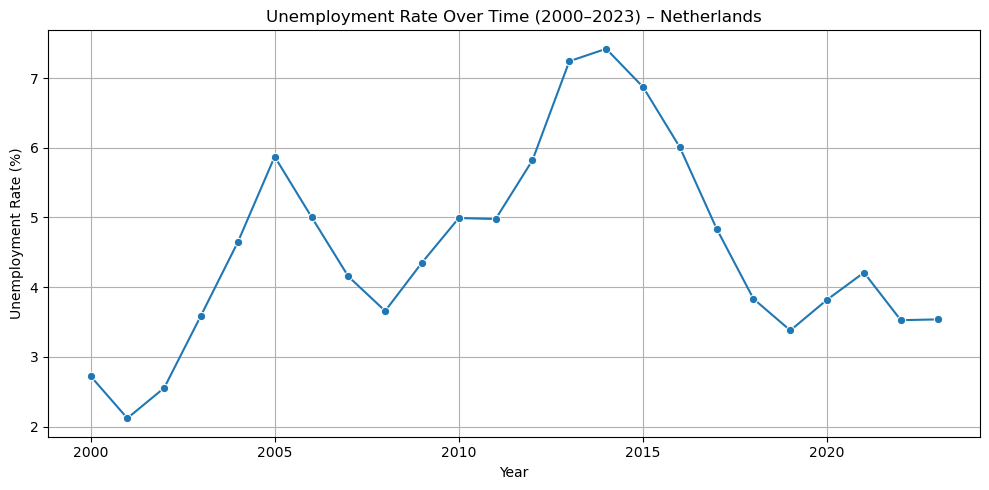

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_nl_long, x="Year", y="Unemployment Rate", marker="o")

plt.title("Unemployment Rate Over Time (2000–2023) – Netherlands")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


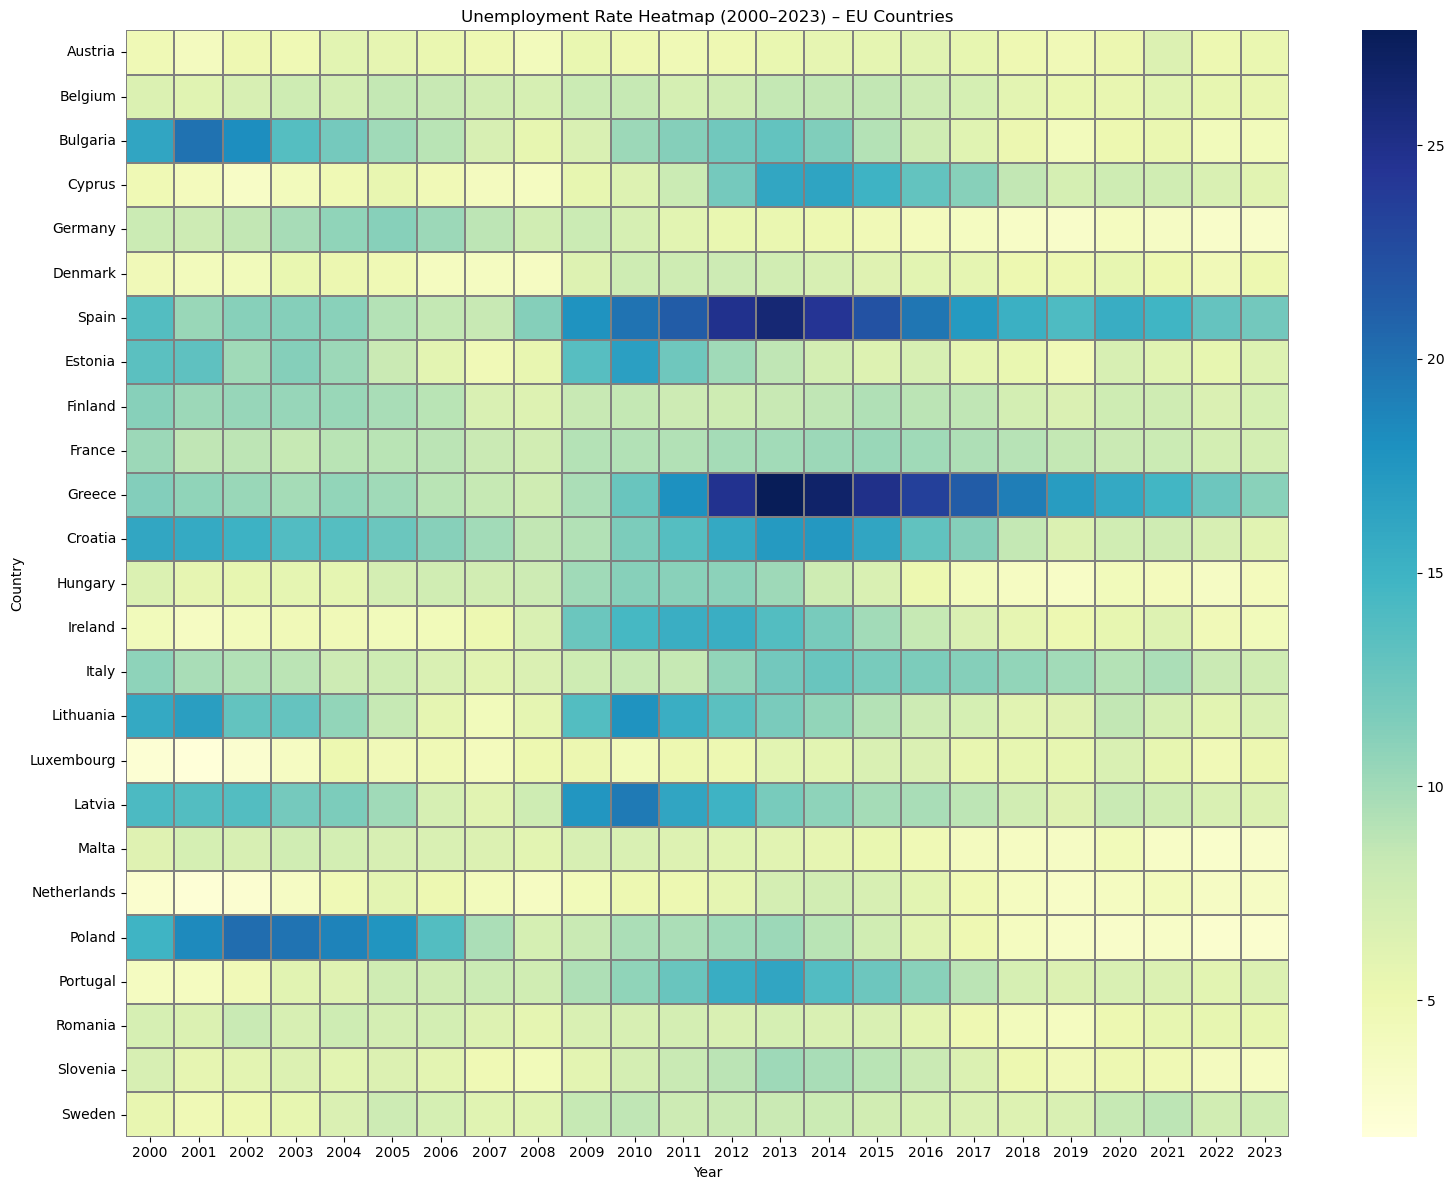

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt


heatmap_data_eu = df_eu.set_index("Country Name")
heatmap_data_eu = heatmap_data_eu.apply(pd.to_numeric, errors='coerce')  # string hatalarını sayıya çevir
heatmap_data_eu = heatmap_data_eu.loc[:, heatmap_data_eu.columns.str.isnumeric()]  # sadece yıl sütunları


plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_data_eu, cmap="YlGnBu", linewidths=0.3, linecolor='gray')
plt.title("Unemployment Rate Heatmap (2000–2023) – EU Countries")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


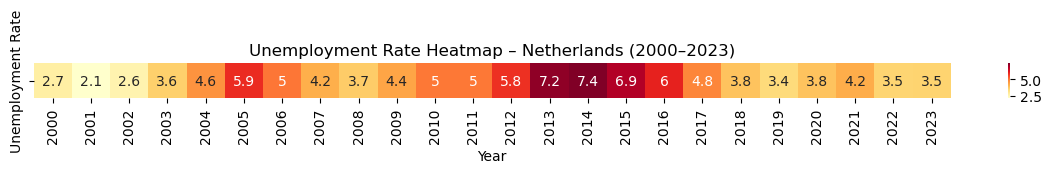

In [39]:

heatmap_nl = df_eu[df_eu["Country Name"] == "Netherlands"]
heatmap_nl = heatmap_nl.drop(columns=["Country Name"])  # ülke adını at
heatmap_nl = heatmap_nl.apply(pd.to_numeric, errors='coerce')  # sayıya çevir


heatmap_nl = heatmap_nl.T  # Transpose
heatmap_nl.columns = ["Unemployment Rate"]  # yeni sütun adı


plt.figure(figsize=(12, 1.5))  # Tek satır olduğu için kısa boy
sns.heatmap(heatmap_nl.T, cmap="YlOrRd", annot=True, cbar=True)
plt.title("Unemployment Rate Heatmap – Netherlands (2000–2023)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()


In [47]:
df_eu.to_csv("Unemployment_EU_Countries.csv", index=False)
